In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


<AxesSubplot:xlabel='HH'>

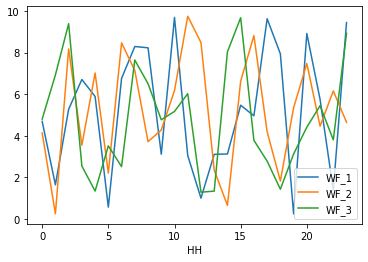

In [5]:
%matplotlib inline

# making an array or smn
wf_data = np.random.rand(24,3)*10

#create a data frame
wf_df = pd.DataFrame(wf_data,columns = ['WF_1','WF_2','WF_3'])
wf_df.index.name = 'HH'
wf_df.head()

wf_df.plot()

In [113]:
df = pd.read_csv('example_data.txt',sep = ",| ", skiprows = 1, names = ["Date","Time","Energy(KWh)"],engine = 'python')


In [114]:
date = df["Date"]
time = df["Time"]
energy = df["Energy(KWh)"]


In [115]:
daily_energy = np.zeros(365)
len(daily_energy)



365

In [116]:
for i in range(0,len(daily_energy)):
   # daily_energy[i] = i
    daily_energy[i] = np.sum(energy[48*i:48*i+47])

In [170]:
annual_array = list(range(1, 366))
month_array = list(range(1,32))


Text(0, 0.5, 'Total daily energy')

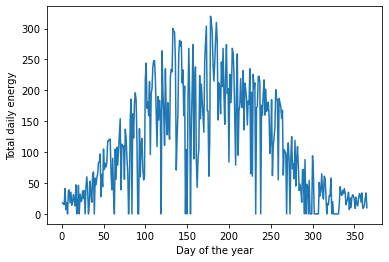

In [119]:
%matplotlib inline
plt.plot(annual_array,daily_energy)
plt.xlabel('Day of the year')
plt.ylabel('Total daily energy')

In [120]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.head()

,Date,Time,Energy(KWh),Month
0,2019-01-01,00:30:00,0.0,1
1,2019-01-01,01:00:00,0.0,1
2,2019-01-01,01:30:00,0.0,1
3,2019-01-01,02:00:00,0.0,1
4,2019-01-01,02:30:00,0.0,1


In [166]:
#selecting out data from June and December
J = df['Month'] == 6
D = df['Month'] == 12
December = df[D]
June = df[J]
December_energy = December['Energy(KWh)']
June_energy = June['Energy(KWh)']
December_energy.head()

16031    0.0
16032    0.0
16033    0.0
16034    0.0
16035    0.0
Name: Energy(KWh), dtype: float64

In [133]:
#initialising arrays for max half-hourly power per day
June_array = np.zeros(31)
December_array = np.zeros(31)


31

In [174]:
for j in range(0,31):
    June_array[j] = max(energy[48*j+7247:7247+48*j+47])
    December_array[j] = max(energy[48*j+16031:48*j+47+16031])

ValueError: max() arg is an empty sequence

In [165]:
print(June_array)

[16. 14.  0. nan 13. 18. 10. 17. 15. 10.  4.  8.  8. 18. 12. 17. 14. 11.
 11. 17. 19. 18. 14. 12.  5.  8. 18. 18. 17. 15. 16.]


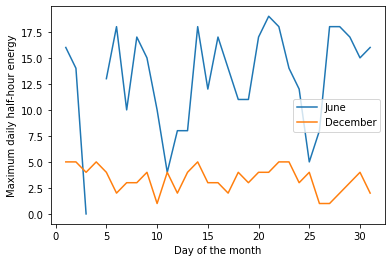

In [171]:
%matplotlib inline
plt.plot(month_array,June_array,label = 'June')
plt.plot(month_array,December_array,label = 'December')
plt.xlabel('Day of the month')
plt.ylabel('Maximum daily half-hour energy')
plt.legend()

In [172]:
June_energy[2]

KeyError: 2

In [173]:
June_energy[8000]

6.0